<a href="https://colab.research.google.com/github/VicenteMercado/ADA-Informes/blob/main/Informe6_Select.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema de la selección.

**Entrada**: Conjunto de $n$ números diferentes $A$  más un índice $i$.

**Salida**: Elemento $x\in A$, que es mayor a exactamente $i-1$ elementos de $A$.

El elemento $x$ se conoce como **estadístico de orden $i$-ésimo** para el conjunto $A$.

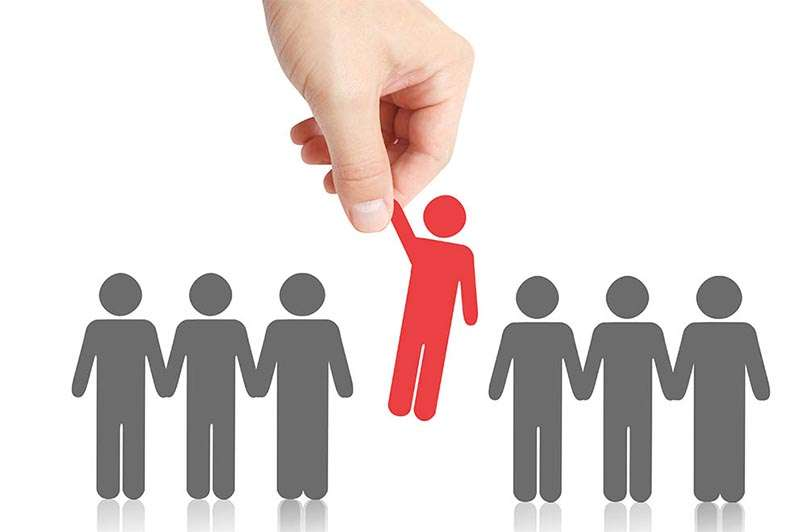

Dentro del mundo de las estadísticas, es importante hallar y poseer parámetros fijos para que, a partir de estos mismos, se encuentre un valor determinado, como la mediana de un conjunto, máximos y mínimos, entre otros. Si lo que queremos es hallar el **i-ésimo elemento menor dentro de un arreglo de elementos** necesitamos, en primer lugar, un pivote adecuado para poder particionar dicho arreglo en subconjuntos y simplificar la búsqueda del elemento, todo esto lo cual satisface el algoritmo **Select**.

#2. Select

##2.1 Código

El siguiente código muestra una implementación del algoritmo `Select`.

In [ ]:
import math
import random

comp = 0 

def Partition(arr,p,r):
  global comp
  pivote = arr[r] #Pivote será el elemento final del arreglo.
  topeIzq = p # Puntero al primer elemento para comparaciones.

  for i in range(p,r):
    if(arr[i] <= pivote): #Si el elemento en i es menor o igual al del pivote, se intercambia con el valor del puntero.
      arr[topeIzq],arr[i] = arr[i], arr[topeIzq] ; comp +=1
      topeIzq +=1 #Aumenta el puntero para comparar en la siguiente posición.

  arr[topeIzq],arr[r] = arr[r],arr[topeIzq]; comp += 1 #Se intercambian los datos entre el puntero final y la última posición.

  return topeIzq #Se retorna el puntero como pivote propuesto.

def insertionSort(arr):
    global comp
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        
        # Comparar cada posición con su cercana por la izquierda para ver si esta última es mayor que la primera o no.
        while j >= 0 and key < arr[j]:
            comp+=1
            aux = arr[j+1]
            arr[j + 1] = arr[j]
            arr[j] = aux
            j = j - 1
        
        # Actualizar key hacia la siguiente posición a evaluar.
        arr[j + 1] = key
    return arr

def PivotSelection(arr,left,right,verbose):
  global comp
  #Se calcula la cantidad de grupos de 5 elementos o menos generados.
  cant_grupos = math.ceil((right-left+1)/5)
  if(verbose): print("Cantidad de grupos de 5 elementos o menos: ", cant_grupos)
  medianas_index = []
  medianas = []
  
  #Se procede a recorrer cada grupo.
  for k in range(cant_grupos):
    subrango_left = left + 5*k
    subrango_right = right + 4 + 5*k

    #Si el subconjunto posee menos de 5 elementos, se trunca a right.
    if(subrango_right > right):
      subrango_right = right
  
    if(verbose): print(arr[subrango_left:subrango_right])
    
    #Se ordena cada grupo generado con InsertionSort.
    arr[subrango_left:subrango_right+1] = insertionSort(arr[subrango_left:subrango_right+1])
    if(verbose): print("Subgrupo ordenado: ", arr[subrango_left:subrango_right])

    #Se ingresa la posición de la mediana a un arreglo auxiliar.
    medianas_index.append((subrango_right + subrango_left)//2)
    if(verbose): 
      print(f"La mediana posee índice {(subrango_right + subrango_left)//2}, se inserta en el arreglo de índices de medianas.")
      print(medianas_index)

    
    #Se ingresa la mediana a otro arreglo auxiliar.
    medianas.append(arr[medianas_index[k]])
    if(verbose): 
      print(f"Dicha mediana es {arr[medianas_index[k]]}, se inserta en el arreglo de índices de medianas.")
      print(medianas)
  
  #Se ordenan las medianas halladas.
  medianas = insertionSort(medianas)
  if(verbose): print("Arreglo de medianas ordenado ", medianas)
  
  #Se encuentra la mediana de las medianas.
  medianaMedianas = medianas[cant_grupos//2]
  if(verbose): print("La mediana de las mediana hallada es: ", medianas[cant_grupos//2])
  
  #Se busca el índice correspondiente a la mediana de medianas.
  for k in range(cant_grupos):
    comp+=1
    if(medianaMedianas == arr[medianas_index[k]]):
      if(verbose): print(f"El índice de la mediana de medianas es encontrado y es {medianas_index[k]}.")
      i = medianas_index[k]
      break
  
  #Se ubica el elemento de índice i al final del arreglo.
  (arr[right], arr[i]) = (arr[i], arr[right])
  if(verbose): 
    print("Se ubica el la mediana de medianas al final del arreglo y es utilizado como pivote.")
    print(arr)
  comp+=1
  
  #Se realiza partición con pivote arr[i].
  return Partition(arr,left,right)

def Select(arr,left,right,i,verbose):
  if(left == right): #Se retorna arreglo de largo 1.
    return arr[left]
  
  if(verbose): print("Se selecciona un pivote adecuado")
  q = PivotSelection(arr,left,right,verbose) #Consigue un pivote adecuado para la instancia.
  if(verbose): print("Pivote conseguido: ", q)

  k = q-left+1 #Posición donde se realiza partition.
  if(verbose): print("Posición de la partición :", k)

  if(i == k):
    if(verbose): print("Posición de pivote igual a la del i-ésimo elemento, fue encontrado!")
    return arr[q] #Si i es equivalente a la posición de partition, se ha encontrado el elemento.

  elif(i<k):
    if(verbose): 
      print("Posición de pivote mayor a la del i-ésimo elemento, se continua con partición izquierda.")
      print(arr[left:q-1])
      print("")
    return Select(arr,left,q-1,i,verbose) #Se continúa con partición izquierda.

  else:
    if(verbose): 
      print("Posición de pivote menor a la del i-ésimo elemento, se continua con partición derecha.")
      print(arr[q+1:right])
      print("")
    return Select(arr,q+1,right,i-k,verbose) #Se continúa con partición derecha.
  
#Ejemplo
a = [4, 8, 3, 7, 11, 29, 21, 10, 2]
i = random.randint(1,9)
print("Input Array: ", a)
verb = False
b = Select(a, 0, len(a)-1,i,verb)
print(f"El {i} elemento menor del arreglo de entrada es {b}")
print("")
print("Comparaciones en total :", comp)


Input Array:  [4, 8, 3, 7, 11, 29, 21, 10, 2]
El 5 elemento menor del arreglo de entrada es 8

Comparaciones en total : 42


##2.2 Descripción del algoritmo

El algoritmo recibe como entrada una lista (o arreglo) $arr$ con la secuencia de $n$ elementos del que se desea conocer su i-ésimo elemento menor.

1. Si el arreglo de entrada posee un largo 1, entonces técnicamente su único elemento es el i-ésimo elemento menor, por lo que se retorna.

2. Para cada llamada recursiva, `Select` consigue un pivote adecuado para el arreglo llamando a la función `PivotSelection`.

3. `PivotSelection` divide el arreglo en subconjuntos de 5 elementos cada uno a lo más para luego ordenarlos con InsertionSort. Después se consigue la mediana de cada subarreglo y se insertan en un arreglo auxiliar. Dicho arreglo se ordena con InsertionSort y se consigue la mediana de las medianas.

4. Luego, se utiliza la mediana conseguida como pivote para particionar el arreglo de entrada con la función `Partition`.

5. Si el i-ésimo elemento menor buscado se encuentra en la misma posición del pivote, se retorna el elemento contenido en dicha posición. De lo contrario:

 * Si la posición del pivote es mayor a la del i-ésimo elemento, se regresa al **paso 1** con la partición izquierda.

 * Si la posición del pivote es menor a la del i-ésimo elemento, se regresa al **paso 1** con la partición derecha.

$n$ será el tamaño del problema en cuestión.

Cuando la variable `verbose` es `True`, se muestra información por pantalla para ver lo que sucede paso a paso dentro de la función de una forma más explícita.


##2.3 Ejemplo

Considere el arreglo, del cual es desea conocer su séptimo elemento menor:

$A = [3, 1, 4, 7, 9, 11, 10, 8]$

En primer lugar y para hallar el pivote adecuado, se divide el arreglo en subconjuntos de 5 elementos cada uno a lo más.

$A_1 = [3, 1, 4, 7, 9] ;  A_2 = [11, 10, 8]$

Luego, cada subarreglo es ordenado de menor a mayor.

$A_1 = [1, 3, 4, 7, 9] ; A_2 = [8, 10, 11]$

Después, se consigue la mediana de cada subarreglo y se guardan sus valores en un arreglo auxiliar.

$ Med = [4 (A_1), 10 (A_2)] $

Acto seguido, se ordena este subarreglo de medianas y se consigue la mediana de las medianas.

$MedianaMedianas = 7$

Como la posición de la mediana de medianas en el arreglo de entrada, es decir, la cuarta posición es menor a la del séptimo elemento menor buscado, se realiza partición en 7 y se realiza el procedimiento nuevamente, pero con la partición derecha.

$A_b = [9, 11, 10, 8]$

Se divide el arreglo en subconjuntos de 5 elementos cada uno a lo más.

$Ab_1 = [9, 11, 10, 8]$

Luego, cada subarreglo es ordenado de menor a mayor.

$Ab_1 = [8, 9, 11, 10]$

Se consigue la mediana de cada subarreglo y se guardan sus valores en un arreglo auxiliar.

$Medianas = [10 (Ab_1)]$

Como el arreglo de medianas es de largo 1, su único elemento es la mediana de las medianas.

$MedianaMedianas = 10$

Como la posición de la mediana de medianas en el arreglo de entrada, la séptima posición, es igual a la del séptimo elemento menor buscado, se dice por ende que **el séptimo elemento menor del arreglo de entrada es 10**.



##2.4 Ejecución del programa paso a paso.

Usando la opción `verbose = True`, se puede apreciar qué ocurre durante el proceso del algoritmo y sus llamadas recursivas. Con propósito de probar distintos casos, se utilizará un arreglo de tamaño $n = 5$, con elementos generados al azar en un rango del 1 al 100 cada uno.

In [113]:
import random
a = random.sample(range(1, 100), 5)
i = random.randint(1,5)
print("Input array: ", a)
print("")
b = Select(a, 0, len(a)-1, i, verbose=True)
print("")
print(f"El {i} elemento menor del arreglo de entrada es {b}")

Input array:  [70, 92, 86, 50, 26]

Se selecciona un pivote adecuado
Cantidad de grupos de 5 elementos o menos:  1
[70, 92, 86, 50]
Subgrupo ordenado:  [26, 50, 70, 86]
La mediana posee índice 2, se inserta en el arreglo de índices de medianas.
[2]
Dicha mediana es 70, se inserta en el arreglo de índices de medianas.
[70]
Arreglo de medianas ordenado  [70]
La mediana de las mediana hallada es:  70
El índice de la mediana de medianas es encontrado y es 2.
Se ubica el la mediana de medianas al final del arreglo y es utilizado como pivote.
[26, 50, 92, 86, 70]
Pivote conseguido:  2
Posición de la partición : 3
Posición de pivote mayor a la del i-ésimo elemento, se continua con partición izquierda.
[26]

Se selecciona un pivote adecuado
Cantidad de grupos de 5 elementos o menos:  1
[26]
Subgrupo ordenado:  [26]
La mediana posee índice 0, se inserta en el arreglo de índices de medianas.
[0]
Dicha mediana es 26, se inserta en el arreglo de índices de medianas.
[26]
Arreglo de medianas ordena

#3. Tiempo de ejecución

##3.1 Teorema

El algoritmo `Select` tiene un tiempo de ejecución de $O(n)$ **en su peor y mejor caso**.

##3.2 Prueba del teorema (Método de inducción).

Se tendrá en cuenta la siguiente fórmula de recursión para el algoritmo `Select`:

$T(n) = T(7n/10) + O(n) + T(n/5)$

Con $O(n)$ el tiempo de ejecución de InsertionSort, $T(n/5)$ encontrar la mediana de las medianas y $T(7n/10)$ la cantidad de elementos sobre la cual se realiza la recursión.

A través del método de la inducción, se busca probar que $T(n) <= dn$, para algún valor de $d > 0$.
Se asume que esto es correcto, y se reemplazan los valores de $T(n)$ por $dn$ y a $O(n)$ por $cn$.

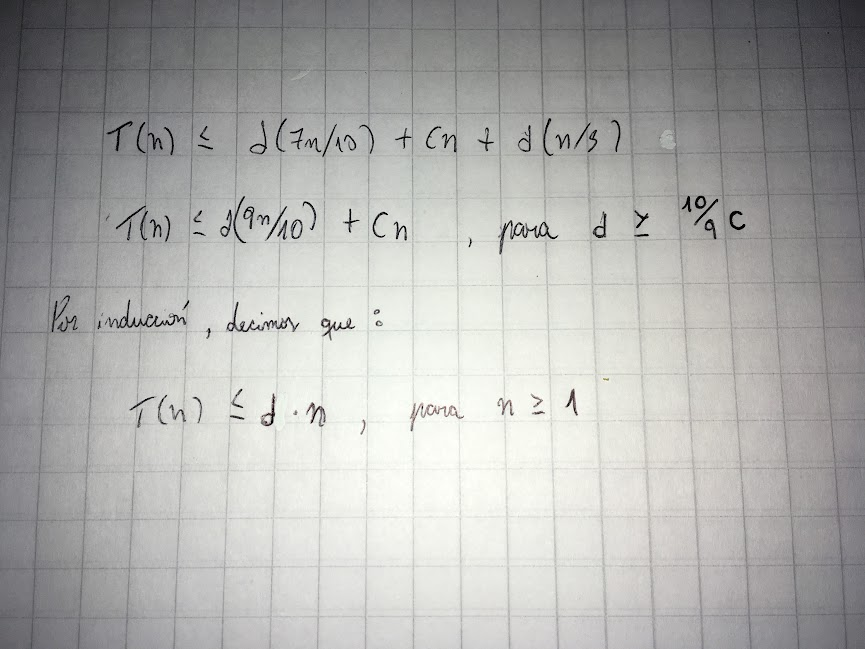

Gracias a la inecuación alcanzada, podemos decir que el algoritmo efectivamente posee un tiempo de ejecución $O(n)$ **en su peor y mejor caso**.

#4. Correctitud

##4.1 Teorema (Correctitud del algoritmo Select)

*El algoritmo Select recibe un arreglo de entrada `arr` junto a un índice i, y retorna un valor `b` perteneciente al arreglo `arr` tal que sea mayor a exactamente `i-1` elementos de `arr`.*

###Prueba del Teorema 1

Para probar la correctitud de este algoritmo, se empleará la siguiente **hipótesis $P(n)$**:

> $Select$ retorna el i-ésimo menor elemento de una secuencia de n elementos.

**Caso base ($n=1$)**

Para este caso, al ver que nuestro arreglo de entrada contiene solamente un elemento, técnicamente su único valor es el i-ésimo menor elemento del arreglo y el algoritmo lo retorna, esto es trivialmente cierto.

**Caso inductivo ($m<n$)**

Para un arreglo $arr$ de $n$ elementos, nuestro algoritmo busca un pivote ideal `q` con la función `PivotSelection`. Como esta función es correcta, siempre retorna el índice del pivote de forma que sea la mediana de las medianas de los subconjuntos de 5 elementos o menos generados a partir del arreglo de entrada.

Luego, dependiendo de si el índice del pivote `q` es menor o mayor al del `i`-ésimo elemento, `Select` se llama a sí misma con la partición derecha o izquierda, respectivamente. Como el tamaño de estas particiones es menor a n, mediante inducción podemos deducir que se consigue el i-ésimo elemento menor de manera correcta, comprobando así que **Select es correcto**.

#5. Experimentos

##5.1 Tiempo de ejecución (Select vs RandomizedSelect)

El siguiente gráfico mostrará la comparación de tiempos de ejecución del algoritmo `Select` frente al de `RandomizedSelect` que selecciona un pivote de manera aleatoria, en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre 5 y 500.

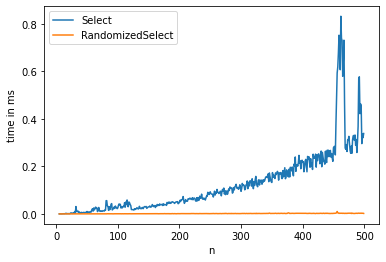

In [114]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

verb = False

def R_Select(arr,left,right,i):
  if(left == right): #Se retorna arreglo de largo 1.
    return arr[left]
  
  q = R_Partition(arr,left,right) #Retorna pivote seleccionado al azar.

  k = q-left+1 #Posición donde se realiza partition.

  if(i == k):
    return arr[q] #Si i es equivalente a la posición de partition, se ha encontrado el elemento.

  elif(i<k):
    return R_Select(arr,left,q-1,i) #Se continúa con partición izquierda.

  else:
    return R_Select(arr,q+1,right,i-k) #Se continúa con partición derecha.

def R_Partition(arr,left,right):

  i = random.randint(left,right)

  (arr[right], arr[i]) = (arr[i], arr[right])

  return Partition(arr,left,right)

x1=[]; x2=[];y1=[]; y2=[]

for n in range(5,500):

  a = random.sample(range(-500, 500), n)
  i=random.randint(1,n)

  #la función repeat está ejecutando 20 veces Select con el arreglo arr y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import Select", stmt=f"Select({a},{0},{len(a)-1},{i},{verb})", repeat=1, number=10)

  x1.append(n)
  y1.append(t)

for n in range(5,500):

  arr = random.sample(range(-500, 500), n)
  p=random.randint(1,n)

  #la función repeat está ejecutando 20 veces R_Select con el arreglo arr y retorna el mejor tiempo obtenido.
  time = repeat(setup="from __main__ import R_Select", stmt=f"R_Select({arr},{0},{len(arr)-1},{p})", repeat=1, number=10)

  x2.append(n)
  y2.append(time)


plt.plot(x1,y1)
plt.plot(x2,y2)
plt.legend(["Select", "RandomizedSelect"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

# Análisis de resultados

Como podemos apreciar en la gráfica, RandomizedSelect supera al algoritmo Select en cuanto a tiempos de ejecución, esto principalmente debido a que el procedimiento para escoger un pivote para la partición es mucho más simple en el primero. Además, se puede notar que Select no es óptimo cuando hay una gran cantidad de elementos, sobretodo porque divide el arreglo en subconjuntos de 5 elementos o menos, teniendo que ir ordenándolos uno por uno y consiguiendo la mediana en cada caso para obtener la mediana de las medianas, es decir, el pivote.

##5.2 Número de comparaciones

A continuación se muestra gráficamente una comparación entre:

* cantidad de comparaciones del peor caso calculadas matemáticamente,
* cantidad de comparaciones del mejor caso calculadas matemáticamente.
* cantidad de comparaciones realizadas experimentalmente para entradas aleatorias.

Se tomarán en cuenta tamaños de problemas con $n \in [10,29]$.

Los arreglos de entrada son generados aleatoriamente haciendo un sampling de un conjunto de números entre 1 y 100.

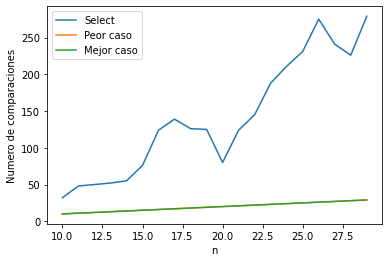

In [ ]:
import matplotlib.pyplot as plt
verb = False
x=[n for n in range(10,30)] 
y1=[n for n in range(10,30)] # worst case
y2=[n for n in range(10,30)] # best case
y=[]; 

for n in range(10,30):
  comp = 0
  a = random.sample(range(1, 100), n)
  i=random.randint(1,n)
  b = Select(a,0,len(a)-1,i,verb)
  y.append(comp)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Select", "Peor caso", "Mejor caso"])

plt.xlabel('n')
plt.ylabel('Numero de comparaciones')
plt.show()

#Análisis de resultados

Al ver la gráfica y tal como era de esperarse, las proyecciones del número de comparaciones en el mejor y peor caso son idénticas entre sí, principalmente porque ambos casos poseen un tiempo de ejecución $O(n)$.

No obstante, nótese cómo la curva del caso promedio está incluso por sobre la del mejor caso. Posiblemente esto se deba a la naturaleza aleatoria de tanto el arreglo en sí como el del i-ésimo elemento menor deseado. El algoritmo siempre busca un pivote que resulte ser dicho elemento buscado, por lo que sigue realizando operaciones con las particiones generadas hasta hallarlo.